# Análise gráfica de funções não lineares

Saber realizar plotagens básicas para analisar o comportamento de funções-alvo (aquelas para as quais procuramos raízes) é essencial para a compreensão de métodos intervalares e abertos que usam aproximações sucessivas.

Neste capítulo, abordaremos os seguintes tópicos: 

- plotagem básica de funções matemáticas com _matplotlib_;
- fluxo de controle e aplicações com o laço `for`;
- algoritmo de determinação de raízes por "força bruta".

## Estudo de caso: salto do paraquedista

Faremos a análise gráfica da função do salto do paraquedista já vista anteriormente, isto é: 

$$v = \dfrac{gm}{c}(1 - e^{-(c/m)t}).$$
Entretanto, antes de continuarmos, vale tecer breves comentários sobre dimensionalidade.

### Variáveis e parâmetros

Em nosso curso, tratamos da determinação de raízes de equações não-lineares em uma dimensão (1D). Isto significa que apenas uma variável é usada como dependente, embora a variável dependente possa requerer depender de outras quantidades para ser computada. No caso da função $v$ acima, o tempo $t$ está sendo tomado como a única variável independente, ao passo que a aceleração da gravidade $g$, a massa $m$ e o coeficiente de arrasto $c$ tornam-se _parâmetros_. 

Aplicando-se uma notação matemática estendida, poderíamos escrever 

$$v = f({\color{red}t};{\color{blue}g},{\color{blue}m},{\color{blue}c}),$$

onde destacamos a variável independente em vermelho e os parâmetros em azul, após o ponto-e-vírgula. Entretanto, qualquer um dos parâmetros poderia ser analisado sob o ponto de vista de variável, assumindo-se as outras quantidades como parâmetros. Para este mesmo exemplo, se quiséssemos estudar a dependência de $v$ por variação de $g$, teríamos de manter $m$, $c$ e $t$ _fixados_, obtendo uma forma tal que

$$v = f({\color{red}g};{\color{blue}m},{\color{blue}c},{\color{blue}t}).$$

Se o mesmo raciocínio for utilizado para $c$, a forma 

$$v = f({\color{red}c};{\color{blue}t},{\color{blue}g},{\color{blue}m})$$

indicaria que $c$ é a variável independente, enquanto $t$, $g$ e $m$ seriam parâmetros com um valor fixado e conhecido.

Assim, por indução, a busca por raízes de equações não-lineares que dependam de $n$ variáveis em apenas uma dimensão deve considerar _uma variável independente com valor mutável_ e $n-1$ _parâmetros com valor fixado_. Usando o Cálculo a várias variáveis, se 

$$
f: \mathbb{R}^n \to \mathbb{R} \\
(x_1,x_2,\ldots,x_n) \mapsto y
$$

é a função não-linear a ser estudada, a forma

$$y = f({\color{red}x_k}; {\color{blue}x_1},{\color{blue}x_2},\ldots,{\color{blue}x_{k-1}},{\color{blue}x_{k+1}},\ldots,{\color{blue}x_{n-1}},{\color{blue}x_n})$$

significaria que a análise é _unidimensional_ sobre a variável $x_k$ nos parâmetros $x_1$ a $x_n$, excluindo-se $x_k$.


Para o nosso exemplo, $n=4$, $y = v$, a variável independente $x_k$ é o coeficiente de arrasto $c$ – note que $k$ pode ser qualquer valor entre 1 e 4 –, $f$ é a expressão matemática $\dfrac{gm}{c}(1 - e^{-(c/m)t})$ e os demais símbolos $x_j$, para $j \neq k$, são os parâmetros.

### Análise gráfica do coeficiente de arrasto

A análise gráfica serve para visualizar o comportamento da função e verificar aproximadamente onde há possíveis raízes. Este processo é conhecido como _localização_.

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

# Parâmetros fixados 
t = 12.0
v = 42.0
m = 70.0
g = 9.81

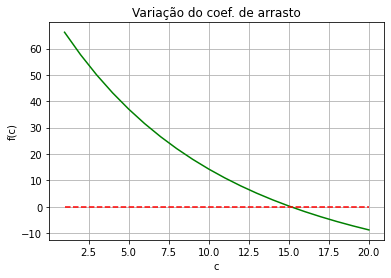

In [8]:
# Localização
a,b = 1,20
c = np.linspace(a,b,20)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-',c,c*0,'r--');
plt.xlabel('c')
plt.ylabel('f(c)')
plt.title('Variação do coef. de arrasto')
plt.grid(True)

### Refinamento

Observa-se que existe uma raiz para $f(c)$ próxima a $c = 15$. Todavia, é difícil precisar seu valor apenas por observação visual. A fim de buscar melhores aproximações, podemos refinar o gráfico realizando uma espécie de _zoom_ até obter um intervalo adequado para aplicação algorítmica.

Nos gráficos abaixo, 

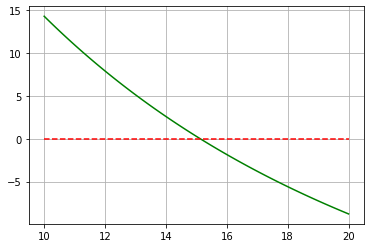

In [9]:
# Refinamento
a,b = 10,20
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-')
plt.plot(c,0*c,'r--')
plt.grid()

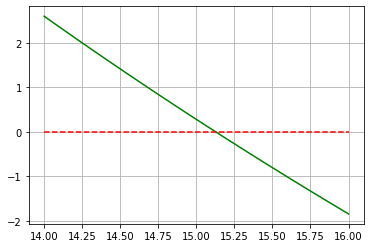

In [10]:
# Refinamento
a,b = 14,16
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-')
plt.plot(c,0*c,'r--')
plt.grid()

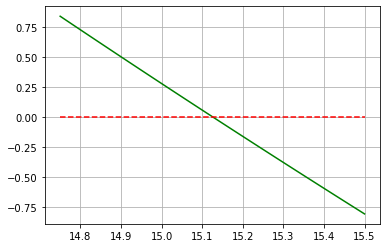

In [11]:
# Refinamento
a,b = 14.75,15.5
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-')
plt.plot(c,0*c,'r--')
plt.grid()

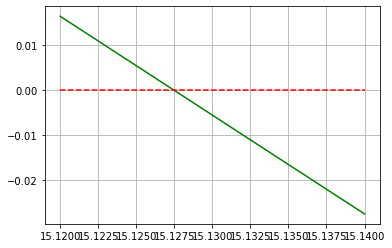

In [14]:
# Refinamento
a,b = 15.12,15.14
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-')
plt.plot(c,0*c,'r--')
plt.grid()

Apenas com esses refinamentos, já é possível determinar a raiz única com um erro absoluto de 0.02 unidades, visto que ela está entre 15.12 e 15.14. Além disso, note como, neste intervalo, a curvatura da função não é mais identificável. Isso mostra que no intervalo $15.10 \leq c \leq 15.20$ $f$ é praticamente "linear". 

Porém, nos casos reais, requeremos precisão muito mais elevada. Então, para melhorarmos a precisão de nossa raiz, precisamos avançar para a segunda etapa, que apoia-se na _aproximação algorítmica_ por processos iterativos.

## Processo iterativo

Processos iterativos em métodos numéricos assumem o caráter de _aproximações sucessivas_, pelo fato de buscarem aproximações melhores para uma quantidade a partir de uma estimativa inicial predefinida. Ou seja, levando em conta que estamos trabalhando com funções em uma dimensão, um processo iterativo a uma variável pode ser descrito por

$$x^{({k})} = \phi(x^{(k-1)}), \ \ k = 1, \ldots, n < \infty$$
$$x^{(0)} = x_0,$$

Acima, $\phi$ é a função de iteração, ao passo que $x_0$ é a _estimativa inicial_ (_initial guess_). Nesta notação, $x^{(k)}$ é a $k$-ésima _iterada_ de uma _sequência numérica discreta_.

### Fluxo de controle

A primeira estrutura de controle fundamental para computação numérica de processos iterativos é o laço `for`. Vamos ver como usá-lo para computar algumas funções iterativas, inclusive plotar os resultados.

- $\phi_1 = \dfrac{ (x^{(k-1)})^{1/2}}{\pi} - x^{(k-1)}, \ \  x^{(0)} = 1, \ \ k < N$

x(0) = 0.5
x(1) = -0.4204
x(2) = 0.3535
x(3) = -0.2972
x(4) = 0.2499
x(5) = -0.2102
x(6) = 0.1767
x(7) = -0.1486
x(8) = 0.1249
x(9) = -0.1051
x(10) = 0.0883
x(11) = -0.0743
x(12) = 0.0625
x(13) = -0.0525
x(14) = 0.0442
x(15) = -0.0371
x(16) = 0.0312
x(17) = -0.0263
x(18) = 0.0221
x(19) = -0.0186
x(20) = 0.0156
x(21) = -0.0131
x(22) = 0.0110
x(23) = -0.0093
x(24) = 0.0078
x(25) = -0.0066
x(26) = 0.0055
x(27) = -0.0046
x(28) = 0.0039
x(29) = -0.0033


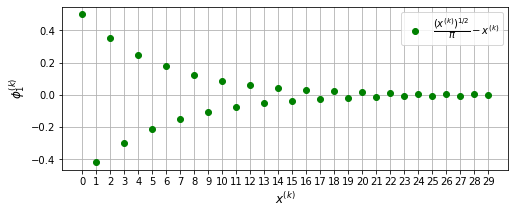

In [7]:
# No. de elementos
N = 30

# Função de iteração
x = [1/2]

print(f'x(0) = {x[0]}')
for k in range(1,N):
    phi = x[k-1]**1/2/np.pi - x[k-1]
    x.append(phi)
    print(f'x({k}) = {phi:.4f}')

# Plotagem
plt.figure(figsize=(8,3))
plt.plot(x,'go',label=r'$\dfrac{ (x^{(k)})^{1/2}}{\pi} - x^{(k)}$')
plt.xticks(range(N))
plt.xlabel('$x^{(k)}$',fontsize=12)
plt.ylabel('$\phi_1^{(k)}$',fontsize=12)
plt.grid(axis='both')
plt.legend(loc='upper right');

- $\phi_2 = \dfrac{k}{x^{(k-1)}}, \ \  x^{(0)} = 1/5, \ \ k < 10$

y(0) = 0.2
y(1) = 5.0000
y(2) = 0.4000
y(3) = 7.5000
y(4) = 0.5333
y(5) = 9.3750
y(6) = 0.6400
y(7) = 10.9375
y(8) = 0.7314
y(9) = 12.3047


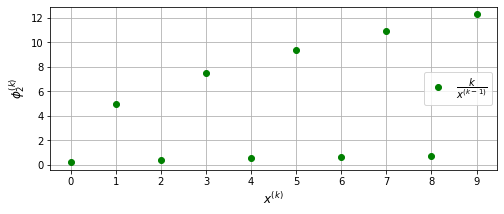

In [8]:
from math import factorial

# No. de elementos
N = 10

# Função de iteração
y = [1/5]
print(f'y(0) = {y[0]}')
for k in range(1,N):
    phi = k/(y[k-1])
    y.append(phi)
    print(f'y({k}) = {phi:.4f}')

# Plotagem
plt.figure(figsize=(8,3))
plt.plot(y,'go',label=r'$\dfrac{k}{x^{(k-1)}}$')
plt.xticks(range(N))
plt.xlabel('$x^{(k)}$',fontsize=12)
plt.ylabel('$\phi_2^{(k)}$',fontsize=12)
plt.grid(axis='both')
plt.legend(loc='center right');

## Determinação de raízes por força bruta

No computador, sabemos que uma função matemática $f(x)$ pode ser representada de duas formas principais:

- através de uma função programada (em Python, por exemplo) que retorna o valor da função para um dado argumento 
- uma coleção de pontos $(x,f(x))$ na forma de uma tabela.

A segunda forma é bem mais útil para análise gráfica. Esta forma é também adequada para resolver problemas de determinação de raízes e de otimização com simplicidade. No primeiro caso, basta pesquisar todos os pontos e procurar onde a função cruza o eixo $x$, como fizemos anteriormente. No segundo caso, buscamos um ponto de mínimo ou máximo local, ou global.

Abordagens que seguem esse caminho podem chegar a examinar uma grande quantidade de pontos. Por essa razão, são chamados de métodos de _força bruta_, isto é, não seguem uma técnica elaborada.

### Algoritmo numérico

Em geral, queremos resolver o problema $f(x) = 0$ especialmente quando $f$ é não-linear. Para isso, desejamos encontrar os $x$ onde $f$ cruza o eixo. Um algoritmo em força bruta deverá percorrer todos os pontos sobre a curva e verificar se um ponto está abaixo do eixo e seu sucessor imediato está acima, ou vice-versa. Se isto ocorrer, então deve haver uma raiz neste intervalo. 

**Algoritmo.** Dado um conjunto de $n+1$ pontos $(x_i,y_i)$, $y_i = f(x_i), \, i = 0,\ldots,n$, onde $x_0 < \ldots < x_n$. Verificamos se $y_i < 0$ e se $y_{i+1} > 0$. Uma expressão compacta para esta checagem é o teste $y_i \, y_{i+1} < 0$. Se o produto for negativo, então a raiz de $f$ está no intervalo $[x_i,x_{i+1}]$. Assumindo uma variação linear entre os pontos, temos a aproximação

$$f(x) \approx \dfrac{ y_{i+1} - y_i }{ x_{i+1} - x_i }(x - x_i) + y_i.$$

Logo, $f(x) = 0$ implica que a raiz é 

$$x = x_i - \dfrac{ x_{i+1} - x_i }{ y_{i+1} - y_i }y_i.$$

**Exemplo.** Encontre a raiz da função $f(x) = \exp(-x^2)\cos(3x)$ usando o algoritmo de força bruta.

Vamos plotar esta função apenas para visualizar seu comportamento.

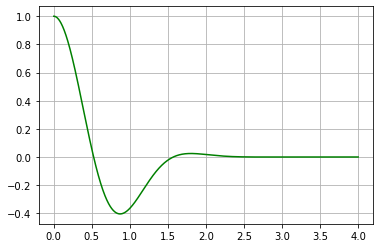

In [9]:
from numpy import exp, cos

f = lambda x: exp(-x**2)*cos(3*x)
x = np.linspace(0,4,1000)
plt.plot(x,f(x),'g'); plt.grid()

Nesta plotagem, vemos claramente que a função possui duas raizes: uma próxima de $x = 0.5$ e outra em $x = \pi/6$. 

Implementemos o algoritmo.

In [10]:
def forca_bruta(f,a,b,n):
    from numpy import linspace
    x = linspace(a,b,n)
    y = f(x)
    raizes = []
    for i in range(n-1):
        if y[i]*y[i+1] < 0:
            raiz = x[i] - (x[i+1] - x[i])/(y[i+1] - y[i])*y[i]
            raizes.append(raiz)
    if len(raizes) == 0:               
        print('Nenhuma raiz foi encontrada')
    return raizes

Agora aplicamos o algoritmo na mesma função.

In [11]:
a,b,n = 0,4,1000
raizes = forca_bruta(f,a,b,n)
print(raizes)

[0.5236017411236913, 1.5708070694852787, 2.6180048381439596, 3.665219264613299]


Temos, na verdade, 4 raízes! Plotemos o gráfico ampliado no intervalo [2.5,3.8].

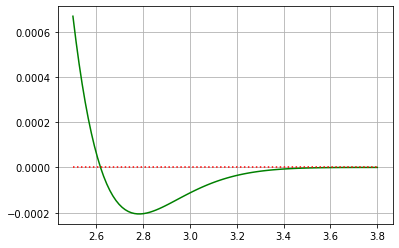

In [15]:
x2 = np.linspace(2.5,3.8,100)
plt.plot(x2,f(x2),'g',x2,0*f(x2),'r:'); plt.grid()

Conseguimos enxergar mais uma raiz. Agora, plotemos um pouco mais ampliado entre [3.6,3.7].

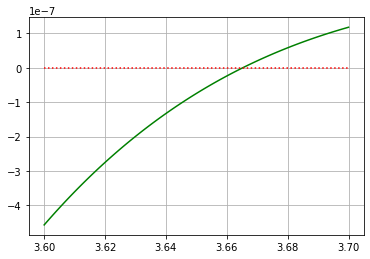

In [16]:
x3 = np.linspace(3.6,3.7,100)
plt.plot(x3,f(x3),'g',x3,0*f(x3),'r:'); plt.grid()

Dessa forma, podemos identificar que, de fato existe uma quarta raiz.

Este exemplo mostrou uma aplicação do método de força bruta para determinação de raízes. Para finalizar, podemos embelezar o gráfico.

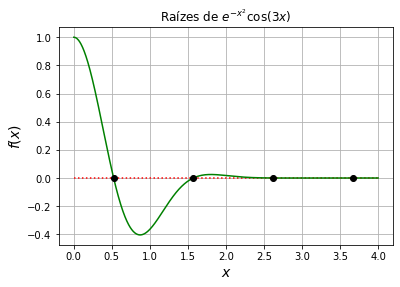

In [14]:
r = np.array(raizes) # vetoriza a lista
plt.plot(x,0*f(x),'r:',x,f(x),'g-',r,np.zeros(4),'ok',)
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$f(x)$',fontsize=14)        
plt.grid()
plt.title('Raízes de $e^{-x^2}\cos(3x)$');

## Tarefas

- Faça a implementação computacional do algoritmo da "força bruta".